In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fm
import numpy as np
from math import radians, cos, sin, asin, sqrt
from copy import deepcopy 

In [2]:
sites = pd.read_csv('sites.csv')
sites.head()

,Site Name,Address,City,State,ZIP,latitude,longitude,Number of Visits in 2019,Average Demand per Visit,StDev(Demand per Visit)
0,MFP American Legion - Binghamton,177 Robinson St,Binghamton,NY,13904,42.108036,-75.887779,11,200.2,46.1
1,MFP Avoca,United Methodist Church,Avoca,NY,14809,42.417447,-77.435843,12,314.6,57.3
2,MFP Bath,St Thomas Church,Bath,NY,14810,42.336217,-77.317505,11,279.5,45.3
3,MFP Beaver Dams,Grace Lee Wesleyan Church,Beaver Dams,NY,14812,42.260641,-76.955986,10,170.7,28.8
4,MFP Birnie Transportation Services,124 Victory Hwy,Painted Post,NY,14870,42.172309,-77.110122,8,213.4,53.4


In [3]:
sortedSites = sites.sort_values(by=['Average Demand per Visit'], ascending=False)
sortedSites

,Site Name,Address,City,State,ZIP,latitude,longitude,Number of Visits in 2019,Average Demand per Visit,StDev(Demand per Visit)
65,MFP Waverly,North Waverly Chapel,Waverly,NY,14892,42.019447,-76.523601,11,396.6,51.9
1,MFP Avoca,United Methodist Church,Avoca,NY,14809,42.417447,-77.435843,12,314.6,57.3
16,MFP Endwell United Methodist Church,3301 Watson Blvd.,Endwell,NY,13760,42.111296,-76.022030,12,285.3,60.8
2,MFP Bath,St Thomas Church,Bath,NY,14810,42.336217,-77.317505,11,279.5,45.3
27,MFP Rathbone,8088 County Road 21,Addison,NY,14801,42.130625,-77.319792,11,269.1,55.6
...,...,...,...,...,...,...,...,...,...,...
48,MFP Senior - Jefferson Village,222 E 2nd St,Watkins Glen,NY,14891,42.382992,-76.871330,11,24.8,2.8
45,MFP Senior - Ellis Hollow,1028 Ellis Hollow Road,Ithaca,NY,14850,42.435955,-76.460374,11,24.7,13.8
54,MFP Senior - Park Terrace Congregate Apartments,1281 Pennsylvania Ave.,Pine City,NY,14871,42.051364,-76.832954,11,24.4,4.4
59,MFP Senior - Wells Apartments,299 Floral Avenue,Johnson City,NY,13760,42.107605,-75.960793,10,23.5,4.6


In [19]:
mean = sites['Average Demand per Visit'].mean()
print(mean)

141.42857142857144


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

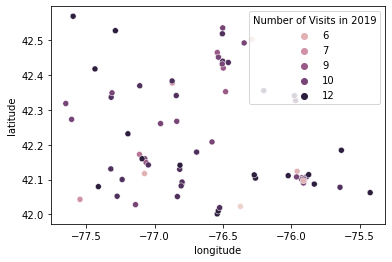

In [4]:
sns.scatterplot(x = 'longitude', y = 'latitude', data = sites, hue='Number of Visits in 2019')

In [18]:
foodMap = fm.Map(location=[42.3, -76.5], tiles='Stamen Toner', zoom_start = 9.2)
coordinates = sites[['latitude', 'longitude']]
coordinateList = coordinates.values.tolist()
print(coordinateList)
for element in coordinateList:
    fm.CircleMarker(element, radius=3, color='blue', opacity=0.3).add_to(foodMap)
foodMap

[[42.108036, -75.88777900000001], [42.4174468, -77.4358433], [42.3362172, -77.3175047], [42.2606415, -76.95598559999999], [42.172309000000006, -77.11012170000001], [42.1053841, -75.9213736], [42.3691309, -77.1081064], [42.231412899999995, -77.1948265], [42.272779, -77.606849], [42.1841905, -75.6329193], [42.1172594, -77.0735445], [42.419935100000004, -76.49696429999999], [42.502126000000004, -76.287671], [42.087090100000005, -75.8309647], [42.3522565, -76.4800051], [42.0625771, -75.422248], [42.111296, -76.02203], [42.178897799999994, -76.6922607], [42.1022814, -75.91295179999999], [42.1598551, -77.07113890000001], [42.5183206, -76.50355379999999], [42.028141999999995, -77.13925970000001], [42.267171999999995, -76.837356], [42.3409968, -76.8412703], [42.02302, -76.37179300000001], [42.1043411, -76.2615965], [42.527209899999995, -77.2866], [42.130625200000004, -77.31979150000001], [42.4919905, -76.3443272], [42.1000047, -75.92245940000001], [42.318273, -77.64936180000001], [42.355152200

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

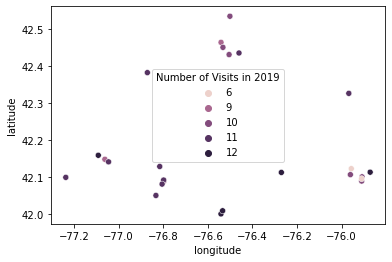

In [16]:
hotSites = sites[sites['Average Demand per Visit'] <= 100]
sns.scatterplot(x = 'longitude', y = 'latitude', data = hotSites, hue='Number of Visits in 2019')

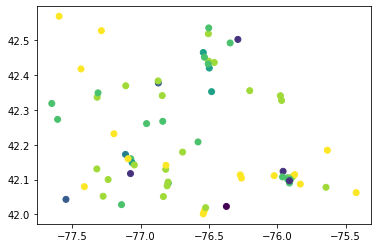

In [7]:
plt.scatter(x = 'longitude', y = 'latitude', data = sites, c='Number of Visits in 2019')

In [113]:
df = pd.read_csv('sites.csv')

optimal = [] #empty list for schedule

demands = np.array((df['Average Demand per Visit']))
increment = np.matmul(demands/28,dists) #how much demand increases every day

excessdemand = 0

first = 0
second = 1

nvisits = np.zeros(70)
for day in range(365):
    control = False
    
    if not control:
        a = deepcopy(demands)
        a = np.sort(a)
        
        highest = a[-1]
        highindex = np.where(demands == highest)
        secondhighest = a[-2]
        secondindex = np.where(demands == secondhighest)
        
        demands = (demands - min(highest,300)*dists[highindex])[0]
        demands = (demands - min(secondhighest,300)*dists[secondindex])[0]
        
        optimal.append([int(highindex[0]),int(secondindex[0])])
        nvisits[highindex] += 1
        nvisits[secondindex] +=1
    
    if control:
        if first>=70:
            first = first - 70
        if second>=70:
            second = second - 70
        
        demands = demands - min(demands[first],300)*dists[first]
        demands = demands - min(demands[second],300)*dists[second]
        
        first +=2
        second +=2
        
        optimal.append([first,second])
        nvisits[highindex] += 1
        nvisits[secondindex] +=1

    demands = demands + increment
    
    excessdemand += sum(demands)
    
print(excessdemand/365)


7939.355385894462


In [130]:
df = pd.read_csv('sites.csv')

schedules = []
optimal = [] #empty list for schedule

demands = np.array((df['Average Demand per Visit']))
daysElapsed = [0] * 70
increment = np.matmul(demands/28, dists) #how much demand increases every day

excessdemand = 0

demandDist = []

first = 0
second = 1
factor = 0.001

nvisits = np.zeros(70)
while factor < 0.05:
    
    fx = [factor*x for x in daysElapsed]
    for day in range(365):
        control = False

        if not control:
            demands = demands + fx
            a = deepcopy(demands)
            a = np.sort(a)

            highest = a[-1]
            highindex = np.where(demands == highest)
            
            secondhighest = a[-2]
            secondindex = np.where(demands == secondhighest)
            
            demands = demands - fx
            
            demands = (demands - min(highest,300)*dists[highindex])[0]
            demands = (demands - min(secondhighest,300)*dists[secondindex])[0]

            optimal.append([int(highindex[0]),int(secondindex[0])])
            nvisits[highindex] += 1
            nvisits[secondindex] +=1
        daysElapsed = [i + 1 for i in daysElapsed]
        daysElapsed[int(highindex[0])] = 0
        daysElapsed[int(secondindex[0])] = 0

        if control:
            if first>=70:
                first = first - 70
            if second>=70:
                second = second - 70

            demands = demands - min(demands[first], 300)*dists[first]
            demands = demands - min(demands[second], 300)*dists[second]

            first +=2
            second +=2

            optimal.append([first,second])
            nvisits[highindex] += 1
            nvisits[secondindex] +=1

        demands = demands + increment

        excessdemand += sum(demands)
        

    
    demandDist.append(excessdemand/365)
    schedules.append(optimal)
    factor += 0.001
demandDist
schedules

[[[65, 1],
  [16, 2],
  [27, 31],
  [12, 61],
  [10, 30],
  [29, 21],
  [65, 28],
  [5, 68],
  [4, 9],
  [64, 67],
  [0, 66],
  [63, 8],
  [69, 20],
  [15, 33],
  [25, 7],
  [3, 17],
  [62, 1],
  [13, 22],
  [26, 14],
  [16, 32],
  [65, 2],
  [18, 23],
  [27, 31],
  [61, 12],
  [10, 34],
  [11, 21],
  [29, 30],
  [6, 19],
  [28, 24],
  [39, 4],
  [5, 64],
  [67, 68],
  [65, 1],
  [0, 9],
  [63, 16],
  [33, 20],
  [2, 66],
  [69, 8],
  [25, 61],
  [31, 27],
  [17, 3],
  [12, 7],
  [10, 22],
  [15, 65],
  [14, 21],
  [29, 13],
  [30, 62],
  [1, 32],
  [28, 23],
  [26, 18],
  [4, 64],
  [16, 5],
  [34, 2],
  [67, 11],
  [68, 65],
  [0, 61],
  [27, 31],
  [9, 63],
  [12, 42],
  [10, 19],
  [33, 20],
  [41, 6],
  [1, 66],
  [24, 25],
  [8, 69],
  [21, 17],
  [29, 65],
  [30, 3],
  [16, 56],
  [7, 39],
  [28, 2],
  [22, 64],
  [4, 14],
  [5, 15],
  [31, 61],
  [27, 13],
  [67, 12],
  [1, 68],
  [65, 57],
  [62, 0],
  [10, 32],
  [23, 9],
  [18, 26],
  [63, 36],
  [52, 16],
  [21, 33],
  [20,

In [138]:
freq = [0] * 70
for j in range(len(optimal)):
    freq[optimal[j][0]] += 1
    freq[optimal[j][1]] += 1
print(freq)

[722, 1122, 1003, 619, 769, 760, 445, 611, 639, 712, 905, 504, 939, 555, 580, 563, 1023, 632, 530, 457, 652, 840, 603, 541, 446, 638, 526, 962, 793, 834, 842, 957, 538, 653, 505, 110, 244, 114, 95, 408, 125, 275, 281, 146, 106, 91, 225, 121, 91, 95, 128, 206, 213, 186, 90, 102, 265, 255, 126, 87, 64, 939, 538, 697, 770, 1420, 650, 726, 723, 638]


In [133]:
schedules[0]

[[65, 1],
 [16, 2],
 [27, 31],
 [12, 61],
 [10, 30],
 [29, 21],
 [65, 28],
 [5, 68],
 [4, 9],
 [64, 67],
 [0, 66],
 [63, 8],
 [69, 20],
 [15, 33],
 [25, 7],
 [3, 17],
 [62, 1],
 [13, 22],
 [26, 14],
 [16, 32],
 [65, 2],
 [18, 23],
 [27, 31],
 [61, 12],
 [10, 34],
 [11, 21],
 [29, 30],
 [6, 19],
 [28, 24],
 [39, 4],
 [5, 64],
 [67, 68],
 [65, 1],
 [0, 9],
 [63, 16],
 [33, 20],
 [2, 66],
 [69, 8],
 [25, 61],
 [31, 27],
 [17, 3],
 [12, 7],
 [10, 22],
 [15, 65],
 [14, 21],
 [29, 13],
 [30, 62],
 [1, 32],
 [28, 23],
 [26, 18],
 [4, 64],
 [16, 5],
 [34, 2],
 [67, 11],
 [68, 65],
 [0, 61],
 [27, 31],
 [9, 63],
 [12, 42],
 [10, 19],
 [33, 20],
 [41, 6],
 [1, 66],
 [24, 25],
 [8, 69],
 [21, 17],
 [29, 65],
 [30, 3],
 [16, 56],
 [7, 39],
 [28, 2],
 [22, 64],
 [4, 14],
 [5, 15],
 [31, 61],
 [27, 13],
 [67, 12],
 [1, 68],
 [65, 57],
 [62, 0],
 [10, 32],
 [23, 9],
 [18, 26],
 [63, 36],
 [52, 16],
 [21, 33],
 [20, 34],
 [2, 29],
 [30, 11],
 [66, 51],
 [65, 46],
 [25, 8],
 [69, 28],
 [1, 31],
 [27, 6

In [137]:
schedules[35]

[[65, 1],
 [16, 2],
 [27, 31],
 [12, 61],
 [10, 30],
 [29, 21],
 [65, 28],
 [5, 68],
 [4, 9],
 [64, 67],
 [0, 66],
 [63, 8],
 [69, 20],
 [15, 33],
 [25, 7],
 [3, 17],
 [62, 1],
 [13, 22],
 [26, 14],
 [16, 32],
 [65, 2],
 [18, 23],
 [27, 31],
 [61, 12],
 [10, 34],
 [11, 21],
 [29, 30],
 [6, 19],
 [28, 24],
 [39, 4],
 [5, 64],
 [67, 68],
 [65, 1],
 [0, 9],
 [63, 16],
 [33, 20],
 [2, 66],
 [69, 8],
 [25, 61],
 [31, 27],
 [17, 3],
 [12, 7],
 [10, 22],
 [15, 65],
 [14, 21],
 [29, 13],
 [30, 62],
 [1, 32],
 [28, 23],
 [26, 18],
 [4, 64],
 [16, 5],
 [34, 2],
 [67, 11],
 [68, 65],
 [0, 61],
 [27, 31],
 [9, 63],
 [12, 42],
 [10, 19],
 [33, 20],
 [41, 6],
 [1, 66],
 [24, 25],
 [8, 69],
 [21, 17],
 [29, 65],
 [30, 3],
 [16, 56],
 [7, 39],
 [28, 2],
 [22, 64],
 [4, 14],
 [5, 15],
 [31, 61],
 [27, 13],
 [67, 12],
 [1, 68],
 [65, 57],
 [62, 0],
 [10, 32],
 [23, 9],
 [18, 26],
 [63, 36],
 [52, 16],
 [21, 33],
 [20, 34],
 [2, 29],
 [30, 11],
 [66, 51],
 [65, 46],
 [25, 8],
 [69, 28],
 [1, 31],
 [27, 6